In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv("StudentScoreData.csv")
df = pd.DataFrame(data)
data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [4]:
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
data.drop("Unnamed: 0", axis = 1 , inplace=True)
data

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


**ANALYSIS**

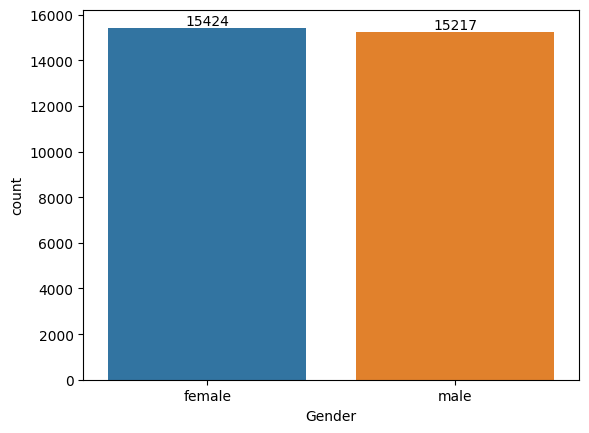

In [9]:
gender_dis = sns.countplot(x="Gender" , data=data , hue="Gender")
for bars in gender_dis.containers:
    gender_dis.bar_label(bars)
plt.show()

THE NUMBER OF FEMALES IS MORE THAN MALES

In [17]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
gb


,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


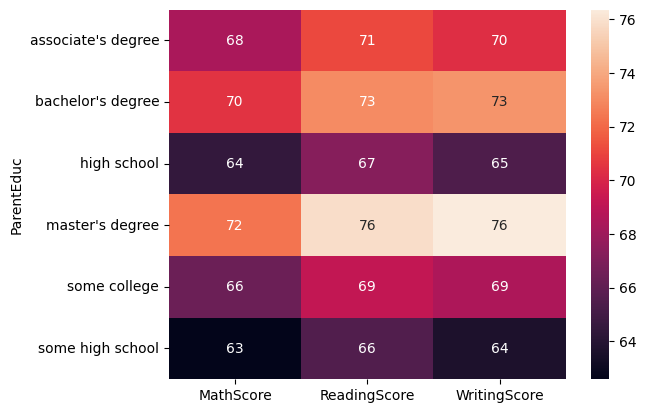

In [20]:
sns.heatmap(gb , annot=True)
plt.show()

**PARENTS EDUCATION HAS A MAJOR IMPACT ON STUDENTS EDUCATION**

<Axes: ylabel='ParentMaritalStatus'>

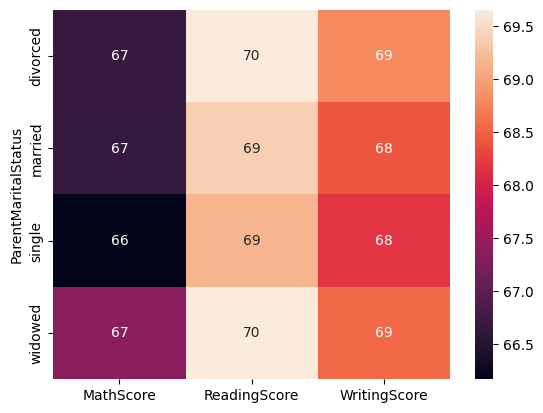

In [21]:
pms = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
sns.heatmap(pms, annot=True)

**PARENT MARITAL STATUS DOES NOT HAVE A MAJOR IMPACT ON STUDENTS SCORE**

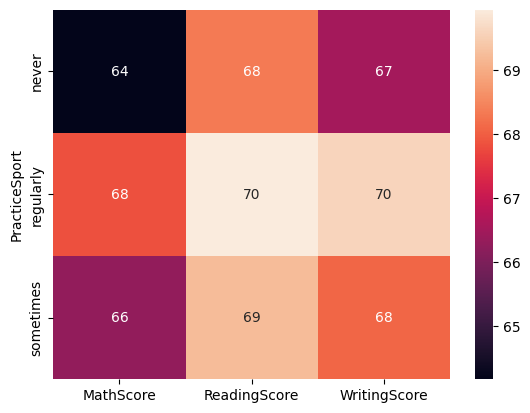

In [23]:
pms = df.groupby("PracticeSport").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
sns.heatmap(pms, annot=True)
plt.show()

**STUDENTS WHO PRACTICE SPORTS OVERALL PERFORM BETTER**

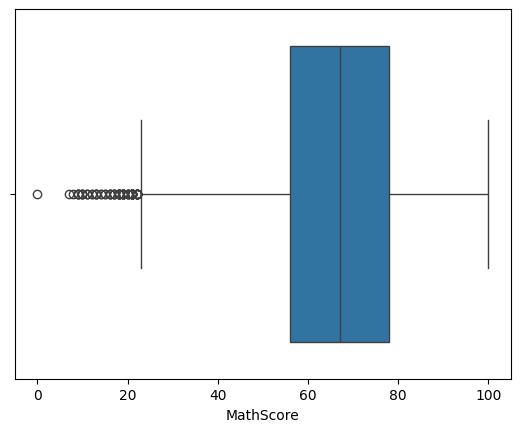

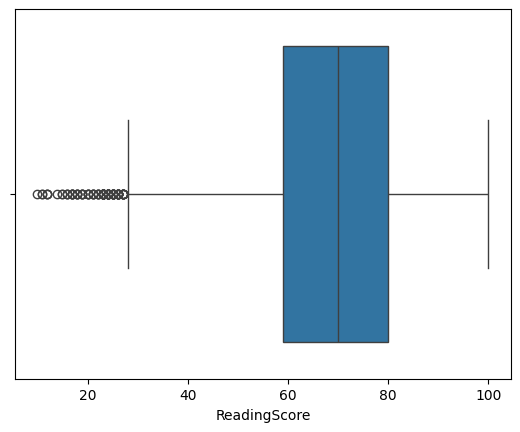

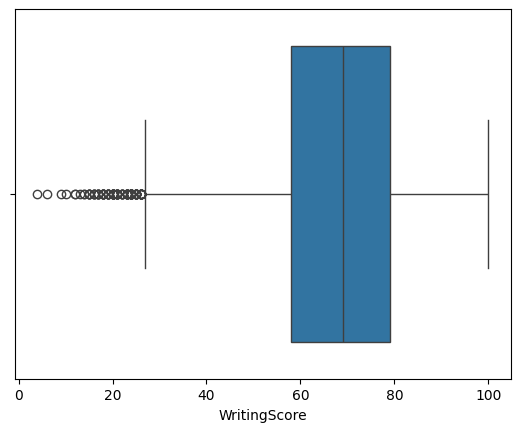

In [25]:
sns.boxplot(data=data , x = "MathScore")
plt.show()
sns.boxplot(data=data , x = "ReadingScore")
plt.show()
sns.boxplot(data=data , x = "WritingScore")
plt.show()

**STUDENTS HAVE WEAKER PERFORMANCE IN MATHS AS COMPARED TO READING AND WRITING**

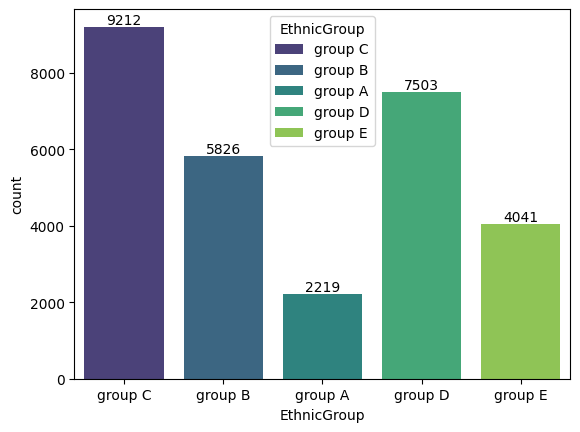

<Axes: ylabel='EthnicGroup'>

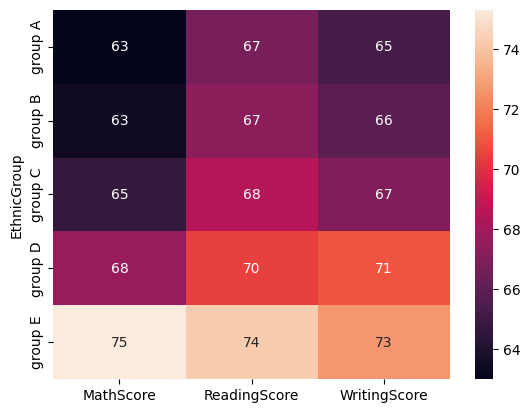

In [32]:
eg = sns.countplot(data=data, x="EthnicGroup", hue="EthnicGroup", palette="viridis")
for bars in eg.containers: 
    eg.bar_label(bars)
plt.show()
egh = df.groupby("EthnicGroup").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
sns.heatmap(egh, annot=True)

**STUDENTS BELONGING TO ETHNIC GROUP E ARE GENERALLY BETTER PERFORMING**

<h1 style="font-weight: bolder; fontsize: 30px;">CONCLUSION:</h1>

Based on the provided statements and observations:

1. **Ethnic Group E Outperforms**: Students belonging to Ethnic Group E generally exhibit better performance across all subjects compared to students from other ethnic groups. This suggests that there may be factors within Ethnic Group E that contribute to academic success.

2. **Math Weakness Compared to Reading and Writing**: There is a notable trend of weaker performance in Mathematics compared to Reading and Writing among the student population. This indicates a potential area for targeted interventions or additional support to improve mathematical proficiency.

3. **Positive Influence of Sports Participation**: Students who practice sports demonstrate better overall academic performance. This implies a positive correlation between physical activity and academic achievement, highlighting the importance of extracurricular activities in holistic student development.

4. **Limited Impact of Parental Marital Status**: Parental marital status does not appear to significantly influence students' academic scores. This suggests that factors other than family structure may play a more substantial role in shaping student outcomes.

5. **Significant Impact of Parental Education**: Parental education emerges as a critical factor influencing students' academic success. Higher levels of parental education are associated with improved student performance, underscoring the importance of parental involvement and educational background in shaping children's educational attainment.

